In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
#df = spark.read.csv("/FileStore/tables/dados_aeronaves.csv", header=True, sep=';')
df = spark.read.csv("/FileStore/tables/dados_aeronaves_mod_2.csv", header=True, sep=';')

df = df.toPandas()

# AirCraft Care

Empresa de manutenção de aeronaves, que está realizando trabalhos baseados em dados disponibilizados pela ANAC com a intenção de oferecer serviços a empresas de pequeno e médio porte (taxi aéreo e aviação comercial)

Objetivo Geral:
 - Trazer insights para tornar as campanhas de ofertas de serviços mais assertivas nas tomadas de decisão
 
 <img src="https://conteudo.imguol.com.br/c/colunas/2a/2022/05/20/jatinho-embraer-phenom-300-modelo-e-um-dos-favoritos-para-o-compartilhamento-de-aeronaves-1653020660864_v2_900x506.jpg" alt="Embraer Phenom" width="500">
 
 <i>Embraer Phenom</i>

In [0]:
df.head()

,MARCA,PROPRIETARIO,OUTROS_PROPRIETARIOS,SG_UF,CPF_CNPJ,NM_OPERADOR,OUTROS_OPERADORES,UF_OPERADOR,CPF_CGC,NR_CERT_MATRICULA,...,DT_VALIDADE_CA,DT_CANC,DS_MOTIVO_CANC,CD_INTERDICAO,CD_MARCA_NAC1,CD_MARCA_NAC2,CD_MARCA_NAC3,CD_MARCA_ESTRANGEIRA,DS_GRAVAME,DT_MATRICULA
0,PPAAM,GOLDGRAIN AGROCEREAIS LTDA,CASSIANO CORAZZA;JAKELINE ALBERTON ARDENGHY;MA...,RS,12.626.145/0001-81,GOLDGRAIN AGROCEREAIS LTDA,CASSIANO CORAZZA;JAKELINE ALBERTON ARDENGHY;MA...,RS,12.626.145/0001-81,18180,...,27052023,null,null,N,null,null,null,null,NENHUM GRAVAME REGISTRADO,22/03/2011 00:00
1,PPAGP,AUSTEN MÁQUINAS E EQUIPAMENTOS LTDA,null,PR,09.106.524/0001-36,AEROSUL LINHAS AÉREAS LTDA,null,PR,27.315.694/0001-02,20205,...,16022026,null,null,N,null,null,null,null,CESSÃO DE USO,14/10/2011 00:00
2,PPAJN,SKYJET BRASIL SERV.AEREOS SA,null,RJ,86.977.642/0001-60,null,null,null,null,0,...,300999,2010-01-28 00:00:00.000,Nº MATRICULA SEM PADRAO,M4,null,null,null,null,RESERVADAS AS MARCAS,None
3,PPAMP,MARIA ELEUZA SOUSA BUENO,null,PA,000.XXX.XXX-00,MARIA ELEUZA SOUSA BUENO,null,PA,000.XXX.XXX-00,5824,...,251097,2022-05-12 00:00:00.000,PERECIMENTO,M,null,null,null,null,MATRÍCULA CANCELADA,23/03/2012 00:00
4,PPAPC,URANO IMPORTADORA E EXPORTADORA DE ELETRÔNICOS...,null,PR,13.055.783/0001-52,URANO IMPORTADORA E EXPORTADORA DE ELETRÔNICOS...,null,PR,13.055.783/0001-52,3213,...,20122020,null,null,C8,null,null,null,null,NENHUM GRAVAME REGISTRADO,07/02/2013 00:00


In [0]:
#Este código trata casos de null na coluna SG_UF que indica a Unidade da Federação onde a aeronave está cadastrada, porém, aeronaves cadastradas fora do Brasil não possuel UF. Por isso se fez necessária a correção.

novo_nome = df["SG_UF"] == "null"
df.loc[novo_nome, "SG_UF"] = "EXT"

### Regiões com maior número de aeronaves registradas
Este levantamento tem como objetivo delegar mais profissionais para as regiões com maior demanda.

<i>Obs.:</i>
- Consideramos que cada registro da tabela é uma aeronave, independente da situaçao da matricula ou se está operacional(em condições de voo).
- Futuramente seria possivel realizar uma melhor análise para entender cada código e justificativa da ANAC para cada linha da tabela.

In [0]:
#Este código mostra a quantidade de aeronaves registradas por UF e Internacionais, ordenadas de forma decrescente
estados = (
    df
    .query('SG_UF != "GB"')
    .groupby('SG_UF')
    .agg(num_aeronaves = ('SG_UF', 'count'))
    .reset_index()
    .sort_values('num_aeronaves', ascending=False)
    .filter(['SG_UF', 'num_aeronaves'])
)

#plot(kind='bar', x='SG_UF', y='num_aeronaves', rot=45);

In [0]:
estados

,SG_UF,num_aeronaves
26,SP,8469
8,EXT,3514
11,MG,2019
13,MT,1834
18,PR,1792
19,RJ,1743
23,RS,1630
9,GO,1620
14,PA,1162
12,MS,956


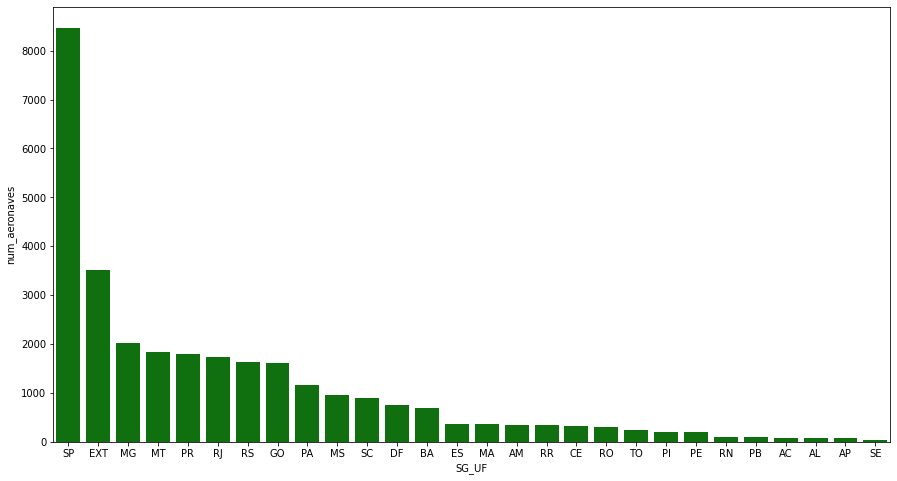

In [0]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(data=estados, x='SG_UF', y='num_aeronaves', ax=ax, color='green');

### Fabricantes com maior número de aeronaves vendidas
Busca direcionar a capacitação dos profissionais para as marcas mais vendidas no mercado (quanto maior o número de unidades fabricadas maior será a demanda)

In [0]:
# Este codigo mostra os fabricantes de aeronaves no mundo ordenados por maior quantidade de unidades de avioes fabricados
fabricantes = (
    df
    .query('NM_FABRICANTE != "null"')
    .groupby('NM_FABRICANTE')
    .agg(fab_aeronaves = ('NM_FABRICANTE', 'count'))
    .reset_index()
    .query('fab_aeronaves > 100')
    .sort_values('fab_aeronaves', ascending=False)
)

In [0]:
fabricantes

,NM_FABRICANTE,fab_aeronaves
425,CESSNA AIRCRAFT,4533
1667,NEIVA,2597
665,EMBRAER,2194
1816,PIPER AIRCRAFT,1912
313,BEECH AIRCRAFT,1479
1942,ROBINSON HELICOPTER,964
331,BOEING COMPANY,749
95,AIR TRACTOR,684
316,BELL HELICOPTER,556
449,CIRRUS DESIGN,460


Out[247]: <AxesSubplot:xlabel='fab_aeronaves', ylabel='NM_FABRICANTE'>

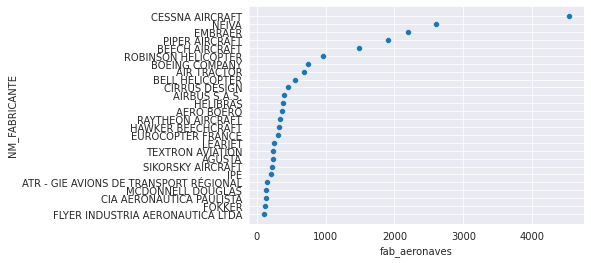

In [0]:
sns.scatterplot(x=fabricantes['fab_aeronaves'].astype(float), y=fabricantes['NM_FABRICANTE'])

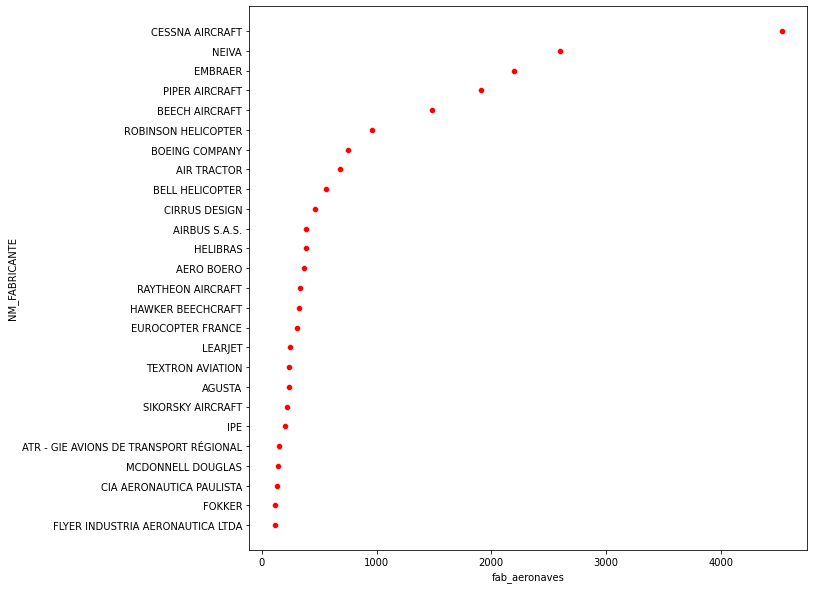

In [0]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(data=fabricantes, x='fab_aeronaves', y='NM_FABRICANTE', ax=ax, color='red');

<i>Obs.:</i>
- Geramos uma outra tabela com as informações sobre o modelo e como implementação futura seria trazer esses dados em formato gráfico.

In [0]:
#Este codigo mostra todos os fabricantes que fabricam ao menos 100 unidades de um modelo de aviao
(
    df
    .query('NM_FABRICANTE != "null"')
    .groupby(['NM_FABRICANTE', 'DS_MODELO'])
    .agg(fab_aeronaves = ('NM_FABRICANTE', 'count'))
    .reset_index()
    .query('fab_aeronaves > 100')
    .sort_values('fab_aeronaves', ascending=False)
)

,NM_FABRICANTE,DS_MODELO,fab_aeronaves
1063,CESSNA AIRCRAFT,182P,474
1629,EMBRAER,EMB-810C,434
3291,NEIVA,EMB-201A,382
1241,CIRRUS DESIGN,SR22,362
3802,ROBINSON HELICOPTER,R44 II,355
3292,NEIVA,EMB-202,312
25,AERO BOERO,AB-115,310
187,AIR TRACTOR,AT-502B,306
3803,ROBINSON HELICOPTER,R66,291
3610,PIPER AIRCRAFT,PA-34-220T,272


<img src="https://www.aopa.org/-/media/Images/AOPA-Main/Aircraft-Guide/Cessna-182-Skylane/03-333_146.jpg?mw=1200&mh=675&as=1&hash=C204B7A87E16C5C16CB128C766D258BE" alt="Girl in a jacket" width="500">
<i>Cessna Aircraft	182P (Modelo mais vendido)</i><br>
<br>

<img src="https://upload.wikimedia.org/wikipedia/commons/9/93/Embraer_EMB-810C_Seneca_AN2001183.jpg" alt="Girl in a jacket" width="500">
<i>Embraer	EMB-810C</i><br>
<br>

<img src="https://www.ej.com.br/imagens/mural_79.jpg" alt="Girl in a jacket" width="500">
<i>Neiva EMB-201A</i>

### Clientes com maior número de aeronaves
Busca abordar os maiores proprietários de aeronaves e oferecer nossos serviços de forma eficiente.

- Leasing

In [0]:
#Este código mostra os 5 maiores proprietários de aeronaves no Brasil

proprietarios = (
    df
    .query('CPF_CNPJ != "null" & CPF_CNPJ != "000.XXX.XXX-00" & CPF_CNPJ != "00.000.000/0000-00" ')
    .groupby('PROPRIETARIO')
    .agg(num_proprietarios = ('CPF_CNPJ', 'count'))
    .reset_index()
    .sort_values('num_proprietarios', ascending=False)
    .head(5)
)

proprietarios

,PROPRIETARIO,num_proprietarios
5510,EMBRAER EMP.BRAS. DE AERONAUTICA S/A,410
7327,GOVERNO FEDERAL ANAC,229
7328,GOVERNO FEDERAL DAC,139
15978,TAM LINHAS AÉREAS S.A,96
2538,BANCO BRADESCO S.A,83


Out[35]: <AxesSubplot:xlabel='num_proprietarios', ylabel='PROPRIETARIO'>

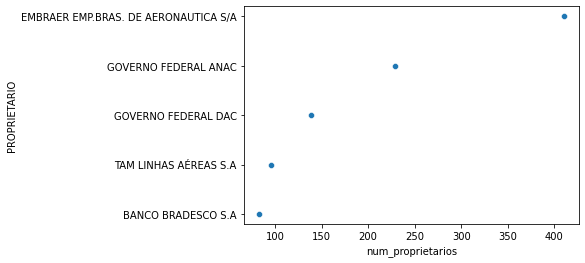

In [0]:
sns.scatterplot(x=proprietarios['num_proprietarios'].astype(float), y=proprietarios['PROPRIETARIO'])

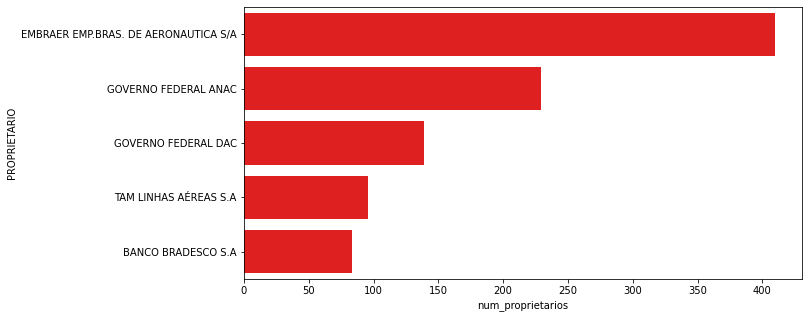

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(data=proprietarios, x='num_proprietarios', y='PROPRIETARIO', ax=ax, color='red');